In [2]:
   #!/usr/bin/python3                                                                                                                                                                                          
__version__ = "0"
 
###############################################################################                                                                                                                             
# Amin Boroomand                                                                                                                                                                     
# summer 2019    
#                                                                                                                                                                                                           
# GOAL: making 2 plots of average-score vs time  & number-of-unique-solutions vs time                                                                                                                                                  
#                                                                                                                                                                                                           
# INPUTS: experiment-table files ___ NetLogo output file                                                                                                                                                                                               
#                                                                                                                                                                                                           
# OUTPUTS:   making 2 plots of average-score vs time  & number-of-unique-solutions vs time                                                                                                                                                                                               
#                                                                                                                                                                                                           
# Procedure: delete fist 6 rows, sort by steps, compute the average of average-score for each step                                                                                                                                                                                                
# make average-score vs step plot. The same procedure for number-of-unique-solutions 

#just paste the filename and modify the plot name and this code works properly
                                                                                                                                      
###############################################################################  

In [3]:
#Imports
%matplotlib notebook
import os
import pandas as pd
from copy import deepcopy
import numpy as np
import matplotlib
matplotlib.use('AGG')
import matplotlib.pyplot as plt
import fnmatch

/home/amin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'nbAgg' by the following code:
  File "/home/amin/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/amin/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/amin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/amin/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/amin/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/h

In [4]:
import re   # to sort numbers numerically 
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [12]:
WDaddress="/home/amin/ABM_Research/After_conf_Dec19/20_k0_HW/"
os.chdir(WDaddress)  #set the working directory
max_step_list=[]
max_score_mean_list=[]
Network_degree_list=[]
max_score_std_list=[]
maxstep_mean_list=[]
maxstep_std_list=[]
Max_Team_std_mean_list=[]
file_name_list=[]
original_data = pd.DataFrame()
for filename in sorted(os.listdir(WDaddress),key=numericalSort):     
    if fnmatch.fnmatch(filename, '*_table.csv'):   #if the files in the folder match this pattern
        file_name_list.append(filename[:-10])
        Raw_file=pd.read_csv(filename, skiprows=6,sep=',',error_bad_lines=False,comment="#" ,header=0) 
        Raw_file = Raw_file.drop('enable-space-analysis', 1)
        Raw_file=Raw_file.sort_values([ '[run number]', '[step]'])
        original_data=original_data.append(Raw_file [:1])

        
        
        Max_steps=Raw_file.groupby(['[run number]'], sort=False)['[step]'].max().reset_index()
        Max_Team_std=Raw_file.groupby(['[run number]'], sort=False)['Team_SD-score'].max().reset_index()
        #####
        Max_Team_std_mean=Max_Team_std["Team_SD-score"].mean() # this is the mean of SD of each teams final solution
        #it shows how team members reach the similar solution or just a few of them reach a good solution. 
        #####
        maxstep_mean=Max_steps["[step]"].mean()
        ####
        maxstep_std=Max_steps["[step]"].std() #sd of final steps
#         print("maxstep_mean= ",maxstep_mean)
#         print("maxstep_std=  ",maxstep_std)
#       max_step_list.append(maxstep_mean)   #make a list of max step of each degree

        Max_scores=Raw_file.groupby(['[run number]'], sort=False)['average-score'].max().reset_index() 
        
         #####
        max_score_mean=Max_scores["average-score"].mean()
        #print("max_score_mean", max_score_mean)
        ########
        max_score_std=Max_scores["average-score"].std() #std of final scores of teams
        #print('max_score_std', max_score_std)
        #####lists####
        max_score_mean_list.append(max_score_mean)  #make a list of average max score of each degree
        max_score_std_list.append(max_score_std)
        maxstep_mean_list.append(maxstep_mean)
        maxstep_std_list.append(maxstep_std)
        Max_Team_std_mean_list.append(Max_Team_std_mean)



original_data.insert(0, "file_name", file_name_list, True) 
original_data.insert(1,"max_score_mean",max_score_mean_list, True)
original_data.insert(2, "max_score_std", max_score_std_list, True)
original_data.insert(3, "maxstep_mean", maxstep_mean_list, True)
original_data.insert(4, "maxstep_std", maxstep_std_list, True)
original_data = original_data.drop(['[run number]', '[step]','average-score','number-of-unique-solutions','Team_SD-score'],axis = 1)
#print(original_data)  
print(original_data, file=open("data_summary.csv", "a"))
Label_names=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20"]
# max_score_mean_list max_score_std_list maxstep_mean_list  maxstep_std_list
print(maxstep_mean_list)

[9.22, 7.88, 6.42, 5.95, 5.01, 4.91, 4.4, 4.39, 3.79, 3.59, 3.52, 3.6, 3.39, 2.96, 2.94, 3.06, 3.18, 2.62, 2.83, 2.42]


<IPython.core.display.Javascript object>


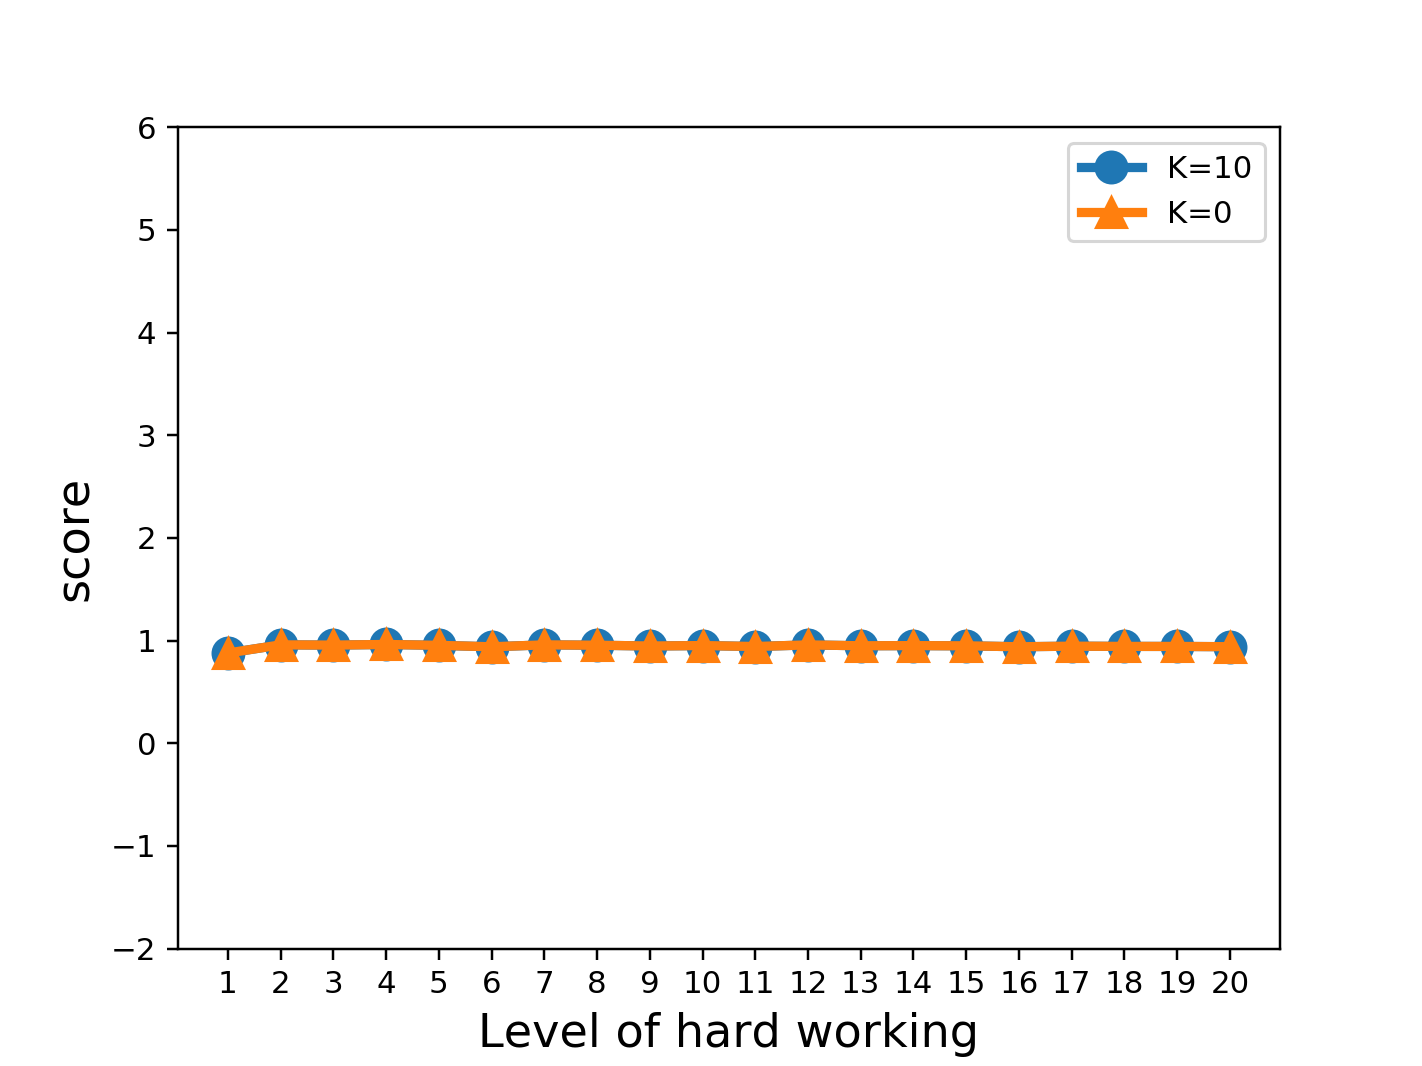

NameError: name 'fig' is not defined

In [11]:




labels=Label_names
y1 = max_score_mean_list
y2 = max_score_mean_list

#marktype https://matplotlib.org/3.1.1/api/markers_api.html

plt.plot(y1, 'o-', label='K=10',markersize=10, linewidth=3.0)
plt.plot(y2, '^-',label='K=0', markersize=10,linewidth=3.0)

#plt.title('100 Runs')
plt.ylabel('score',fontsize=15)
plt.xlabel('Level of hard working',fontsize=15)

#x = np.arange(len(labels),labels)
#x=np.arange(4), ('Tom', 'Dick', 'Harry', 'Sally')
#plt.xticks(x)
plt.xticks(np.arange(len(labels)), labels)

plt.ylim(-2, 6) 

plt.legend(loc = 'upper right', fontsize=10)


fig.tight_layout()
# get the lines and texts inside legend box

leg = plt.legend()
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()
plt.setp(leg_lines, linewidth=2)
plt.setp(leg_texts, fontsize='x-large')
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

plt.savefig('test.png',dpi = 1000)
plt.show()

<IPython.core.display.Javascript object>


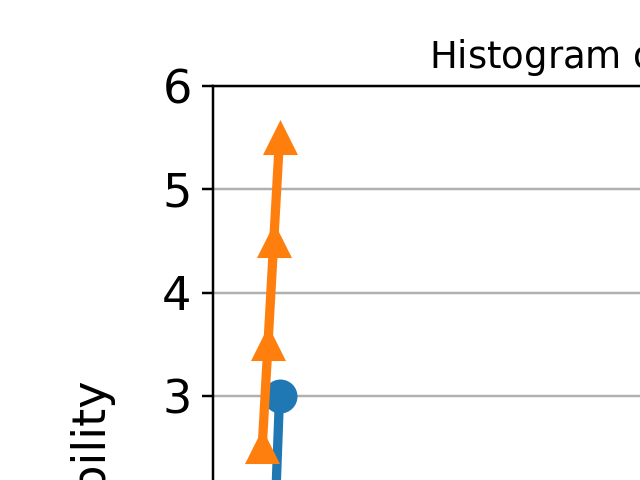

In [41]:
# Name_nemoodar=["Normal","RT 5","RT 10",'RT 20']
# x_pos = np.arange(len(Name_nemoodar))
# max_score_mean_list=[0.15583102914223967, 0.252553302694484, 0.21512152220829356, 0.21129041933816797]
# max_score_std_list =[0.1280003219010811, 0.15237363470266302, 0.12866448683821424, 0.13330592006125097]
# fig, ax = plt.subplots()
# ax.bar(x_pos, max_score_mean_list, yerr=max_score_std_list , align='center', alpha=0.5, ecolor='black', capsize=10)
# ax.set_ylabel('Score', fontsize=17)
# ax.set_xlabel('N=20, K=10', fontsize=17)
# ax.set_xticks(x_pos)
# ax.set_xticklabels(Name_nemoodar, fontsize=14)
# ax.set_title('100Runs, 20 Risk Taker Agents, Lattice Network Degree 4 ', fontsize=15)
# ax.yaxis.grid(True)
# ax.set_ylim(0, 1.1)

# # Save the figure and show
# plt.tight_layout()
# plt.savefig('100Run_20Agents_lattice_deg4_RT_score_K10.png', dpi = 1000)
# plt.show()

In [6]:
plt.bar(['1','1','1','1'],[13,14,15,16],yerr=[2,3,4,5], align='center', alpha=0.6, capsize=10, color=['red'])
plt.xlabel('Speed Level')
plt.ylabel('Fittnes Score')
plt.title('20 Agents  19K 20N')
plt.savefig('19K_speed_plot.png', dpi = 300)
plt.show()

In [7]:
y_pos = np.arange(len(Network_degree_list))
plt.bar(y_pos, max_step_list, align='center', alpha=0.6)
plt.xticks(y_pos, Network_degree_list)
plt.ylabel('ticks ')
plt.xlabel('Network degree')

plt.title('20 fast 5x Agents, N=20, K=5, ring lattice network ')

plt.show()
plt.savefig("CMpie.png")